In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("food_coded.csv")

In [3]:
dataset.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
x = dataset.iloc[:,1:3].values
x[0:10]

array([[2, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [5]:
extracted_dataset = dataset[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]

In [6]:
extracted_dataset.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


In [7]:
import seaborn as sns

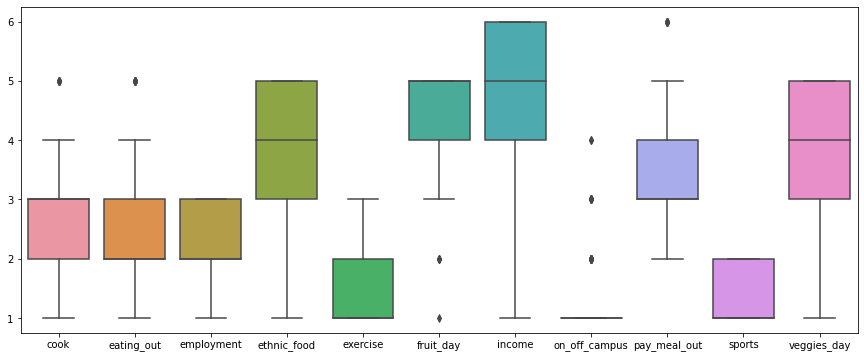

In [8]:
plt.figure(figsize=(15,6))
sns.boxplot(data= extracted_dataset)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.preprocessing import StandardScaler
x = extracted_dataset.values[:,1:]
x = np.nan_to_num(x)
processed_dataset = StandardScaler().fit_transform(x)
processed_dataset

array([[ 0.38794009,  0.89474058, -2.3405473 , ..., -1.35892143,
        -0.71543897,  0.92107429],
       [-0.49374193, -0.33429868,  0.2183601 , ...,  0.57136469,
        -0.71543897, -0.00742802],
       [-0.49374193,  0.89474058,  1.07132923, ..., -0.39377837,
         1.22868867,  0.92107429],
       ...,
       [ 0.38794009,  0.89474058,  1.07132923, ...,  0.57136469,
         1.22868867, -0.00742802],
       [ 2.15130413, -0.33429868, -1.48757817, ..., -0.39377837,
         1.22868867, -0.93593032],
       [-1.37542395, -0.33429868, -0.63460904, ..., -0.39377837,
         1.22868867, -0.00742802]])

In [11]:
k_means = KMeans(n_clusters=3)
k_means5 = k_means.fit_predict(x)
labels = k_means.labels_
labels

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1], dtype=int32)

In [12]:
k_means.cluster_centers_

array([[2.60606061, 2.40909091, 4.03030303, 1.24242424, 4.66666667,
        5.24242424, 1.34848485, 3.39393939, 1.28787879, 4.53030303],
       [2.47368421, 2.26315789, 3.        , 1.84210526, 3.28947368,
        4.55263158, 1.23684211, 3.76315789, 1.39473684, 2.76315789],
       [2.57142857, 1.85714286, 4.19047619, 1.23809524, 4.52380952,
        2.04761905, 1.33333333, 2.80952381, 1.57142857, 4.61904762]])

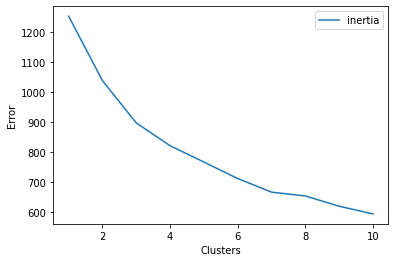

In [13]:
Error = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i).fit(x)
    Error.append(k_means.inertia_)
plt.plot(range(1,11),Error,label='inertia')
plt.xlabel("Clusters")
plt.ylabel("Error")
plt.legend()
plt.show()

In [14]:
k_means3 = KMeans(n_clusters=4)
labels = k_means3.fit_predict(x)
labels

array([3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 3, 1, 1, 1,
       3, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 0, 3, 0,
       2, 2, 2, 3, 2, 1, 0, 2, 2, 0, 2, 0, 2, 3, 2, 2, 2, 1, 3, 2, 0, 1,
       3, 2, 2, 3, 0, 2, 2, 3, 1, 2, 1, 1, 3, 2, 1, 1, 1, 0, 2, 3, 2, 3,
       0, 0, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 0, 2, 0, 2, 2, 1, 0, 2, 3, 3,
       1, 1, 2, 1, 1, 3, 0, 0, 0, 0, 2, 0, 0, 3, 1], dtype=int32)

In [15]:
k_means3.cluster_centers_

array([[2.57142857, 1.85714286, 4.19047619, 1.23809524, 4.52380952,
        2.04761905, 1.33333333, 2.80952381, 1.57142857, 4.61904762],
       [2.57692308, 2.23076923, 3.        , 1.84615385, 2.96153846,
        4.19230769, 1.34615385, 3.76923077, 1.46153846, 2.5       ],
       [2.5       , 2.42307692, 4.59615385, 1.40384615, 4.53846154,
        5.15384615, 1.34615385, 3.46153846, 1.28846154, 4.46153846],
       [2.65384615, 2.34615385, 2.42307692, 1.19230769, 4.61538462,
        5.46153846, 1.19230769, 3.42307692, 1.26923077, 4.11538462]])

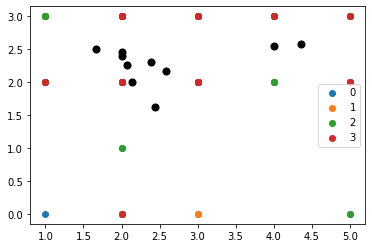

In [16]:
u_labels = np.unique(labels)
centroids = k_means.cluster_centers_
#plotting the results:
for i in u_labels:
    plt.scatter(x[labels == i,0] , x[labels == i,1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

In [17]:
dataset['Cluster_num'] = labels
dataset.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Cluster_num
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,3
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,2
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,2
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",2
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,2


In [58]:
extracted_dataset["Cluster_num"] =labels
extracted_dataset.head()

/home/aritra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,Cluster_num
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,0
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,1
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,1
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,1
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,1


In [59]:
extracted_dataset.groupby('Cluster_num').mean()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
Cluster_num,,,,,,,,,,,
0,2.772727,4.217391,2.590909,3.565217,1.250000,4.478261,5.130435,1.347826,3.086957,1.260870,4.130435
1,2.830189,2.000000,2.490196,4.150943,1.574468,4.528302,5.188679,1.283019,3.471698,1.264151,4.509434
2,2.684211,2.450000,2.250000,4.250000,1.562500,4.550000,2.105263,1.421053,2.850000,1.684211,4.650000
3,2.785714,2.344828,2.370370,2.793103,1.862069,3.241379,4.448276,1.310345,3.931034,1.535714,2.551724


## List of extracted labels for final clustering

### Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Indian Chinese Restaurant,Gym,Fruit & Vegetable Store,Gym / Fitness Center,Health Food Store,Playground,Athletics & Sports,Arcade,Bowling Alley